In [1]:
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import OffsetImage
import squarify
from functools import reduce

### Draw a simple pitch

In [2]:
def draw_pitch(ax):
    #size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

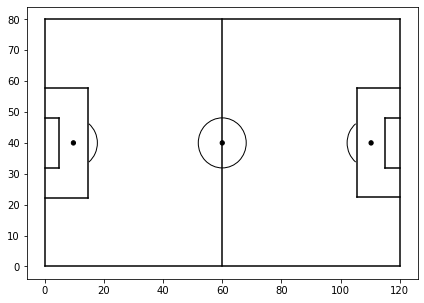

In [3]:
fig = plt.figure()
fig.set_size_inches(7, 5)
ax = fig.add_subplot(1, 1, 1)
draw_pitch(ax)
plt.show()

### Drawing PassMaps

In [4]:
with open('D:/VS/Data-Visualization/Data/7567.json') as data_file:
    data = json.load(data_file)

In [5]:
df = json_normalize(data, sep = "_")
player_pass = df[(df['type_name'] == "Pass")& (df['player_name']=='Toni Kroos')] # get passing information of Ozil
pass_column = [i for i in df.columns if i.startswith("pass")]
player_pass = player_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
player_pass.head()

<ipython-input-5-09d1a147f099>:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(data, sep = "_")


,id,period,timestamp,location,pass_end_location,pass_recipient_name
8,7b43d9ed-8e1e-4b4b-ba5a-acd49070b787,1,00:00:01.880,"[49.0, 35.0]","[58.0, 42.0]",Mesut Ã–zil
19,433dc962-657d-4d11-8b45-bac407ef5ff0,1,00:00:08.680,"[47.0, 36.0]","[28.0, 56.0]",Niklas SÃ¼le
29,0de94b7c-ca9e-4199-8f84-10fb4db5be49,1,00:00:17.040,"[28.0, 45.0]","[28.0, 57.0]",Sami Khedira
39,f326456c-c90a-4f59-a753-775a8fdc8077,1,00:00:26.307,"[34.0, 32.0]","[47.0, 38.0]",Sami Khedira
43,9fcedc85-5f3b-4a68-b66e-5148006c0f6e,1,00:00:28.360,"[39.0, 36.0]","[54.0, 62.0]",Niklas SÃ¼le


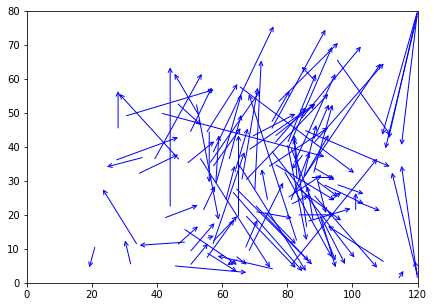

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0,120])
ax.set_ylim([0,80])
for i in range(len(player_pass)):
    # can also differentiate by color
    color = "blue" if player_pass.iloc[i]['period'] == 1 else "red"
    ax.annotate("", xy = (player_pass.iloc[i]['pass_end_location'][0], player_pass.iloc[i]['pass_end_location'][1]), xycoords = 'data', xytext = (player_pass.iloc[i]['location'][0], player_pass.iloc[i]['location'][1]), textcoords = 'data', arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)
plt.show()

### Heatmaps

In [7]:
player_action = df[(df['player_name'] == 'Toni Kroos')][["id", "type_name", "period", "timestamp", "location"]]
player_action.head()

,id,type_name,period,timestamp,location
5,a335a61a-4eaa-41ac-bde6-9d82164260f0,Ball Receipt*,1,00:00:01.160,"[49.0, 35.0]"
6,05876bde-9963-4494-b2a7-0f8e18f38ad4,Carry,1,00:00:01.160,"[49.0, 35.0]"
8,7b43d9ed-8e1e-4b4b-ba5a-acd49070b787,Pass,1,00:00:01.880,"[49.0, 35.0]"
18,89bb6aba-fe64-4c6b-8bfb-13401d8c1547,Ball Receipt*,1,00:00:08.680,"[47.0, 37.0]"
19,433dc962-657d-4d11-8b45-bac407ef5ff0,Pass,1,00:00:08.680,"[47.0, 36.0]"


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

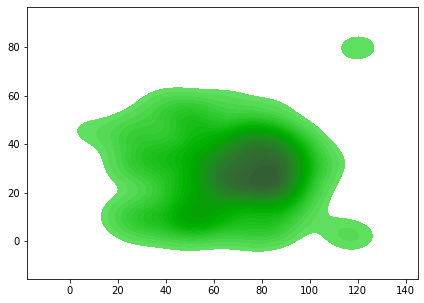

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

x_coord = [i[0] for i in player_action['location']]
y_coord = [i[1] for i in player_action['location']]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks

sns.kdeplot(x_coord, y_coord, shade="True", color= "green", n_levels = 30)

### Lets visualize the heatmap and the pass map together

In [9]:
def heat_pass_map(data, player_name):
    pass_data = data[(data['type_name'] == "Pass") & (data['player_name'] == player_name)]
    action_data = data[(data['player_name']==player_name)]
    
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    for i in range(len(pass_data)):
        # we also differentiate different half by different color
        color = "blue" if pass_data.iloc[i]['period'] == 1 else "red"
        ax.annotate("", xy = (pass_data.iloc[i]['pass_end_location'][0], pass_data.iloc[i]['pass_end_location'][1]), xycoords = 'data', xytext = (pass_data.iloc[i]['location'][0], pass_data.iloc[i]['location'][1]), textcoords = 'data', arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
    x_coord = [i[0] for i in action_data["location"]]
    y_coord = [i[1] for i in action_data["location"]]
    sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
    plt.ylim(0, 80) # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


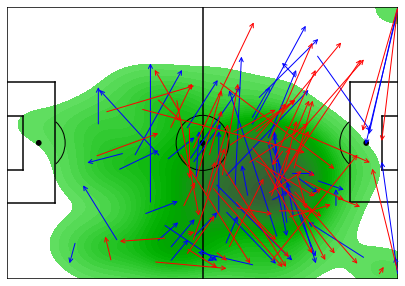

In [10]:
heat_pass_map(df, 'Toni Kroos')

## *Football Club Barcelona*
Lets explore and visualize the shots from all different angles made by FCB in 5 different matches

In [25]:
data_id = [15946, 15956, 15978, 15986, 15998]
all_fcb = pd.DataFrame()
for i in data_id:
    with open(str(i)+".json") as data_file:
        data = json.load(data_file)
    df = json_normalize(data, sep="_")
    if all_fcb.empty:
        all_fcb = df
    else:
        all_fcb = pd.concat([all_fcb, df], join = "outer", sort = False)

<ipython-input-25-f032468b0510>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(data, sep="_")


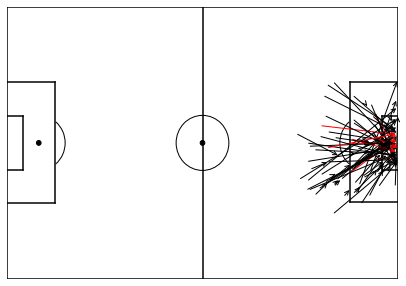

In [26]:
shot_data = all_fcb[(all_fcb["type_name"] == "Shot")&(all_fcb["team_name"] == "Barcelona")]

fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')

for i in range(len(shot_data)):
    # can also differentiate different half by different color
    color = "red" if shot_data.iloc[i]['shot_outcome_name'] == "Goal" else "black"
    ax.annotate("", xy = (shot_data.iloc[i]['shot_end_location'][0], shot_data.iloc[i]['shot_end_location'][1]), xycoords = 'data', xytext = (shot_data.iloc[i]['location'][0], shot_data.iloc[i]['location'][1]), textcoords = 'data', arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = color),)
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.show()

The plot is not very useful, but we can see that majority of the goals came from inside the 6-yard boxes. Most of the shots beyond the 6-yard box have either been intercepted or off-target.

In [27]:
def draw_half_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([60,0], width = 60, height = 80, fill = False)
    #Right Penalty Area
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)

    #Right 6-yard Box
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = Arc((60,40),width = 8.1, height = 8.1, angle=0,theta1=270,theta2=90,color="black")
    centreSpot = plt.Circle((60,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, RightPenalty, RightSixYard, centreCircle, centreSpot, rightPenSpot, rightArc]
    for i in element:
        ax.add_patch(i)

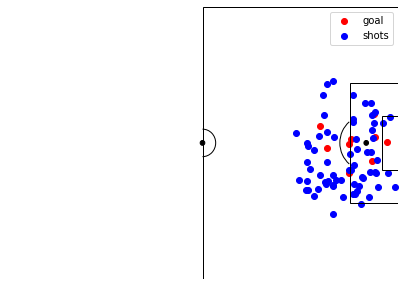

In [28]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_half_pitch(ax)
plt.axis('off')
# draw the scatter plot for goals
x_coord_goal = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
y_coord_goal = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] == "Goal"]
# shots that end up with no goal
x_coord = [location[0] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
y_coord = [location[1] for i, location in enumerate(shot_data["location"]) if shot_data.iloc[i]['shot_outcome_name'] != "Goal"]
# put the two scatter plots on to the pitch
ax.scatter(x_coord_goal, y_coord_goal, c = 'red', label = 'goal')
ax.scatter(x_coord, y_coord, c = 'blue', label = 'shots')
plt.ylim(0, 80)
plt.xlim(0, 120)
plt.legend(loc='upper right')
plt.axis('off')
plt.show()

In [44]:
all_fcb['type_name'] = all_fcb['type_name'].replace(['Ball Receipt*'], 'Ball Receipt')
typ_name = all_fcb['type_name'].unique()
typ_name

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Pressure', 'Ball Recovery', 'Miscontrol', 'Block', 'Camera On',
       'Shot', 'Goal Keeper', 'Duel', 'Clearance', 'Dispossessed',
       'Dribble', 'Foul Committed', 'Foul Won', 'Interception',
       'Dribbled Past', 'Camera off', 'Bad Behaviour', 'Half End',
       'Substitution', 'Tactical Shift', 'Injury Stoppage', 'Error',
       'Shield', '50/50'], dtype=object)

In [46]:
dflist = ['T_Pass', 'Ball_Receipt', 'Carry', 'Interception', 'Pressure', 'Block','Ball_Recovery', 'Shot', 'Dribble', 'Duel', 'Clearance', 'Shield', 'Goal_Keeper']
 
T_Pass = all_fcb.groupby('player_name')['type_name'].apply(lambda x: (x == "'Pass'").count()).reset_index(name = "T_Pass")
Ball_Receipt = all_fcb.groupby('player_name')['type_name'].apply(lambda x: (x == "Ball Receipt").sum()).reset_index(name = "Ball_Receipt")
Carry = all_fcb.groupby('player_name')['type_name'].apply(lambda x: (x == "Carry").sum()).reset_index(name = "Carry")
Interception = all_fcb.groupby('player_name')['type_name'].apply(lambda x: (x == "Interception").sum()).reset_index(name = "Interception")
Pressure = all_fcb.groupby('player_name')['type_name'].apply(lambda x: (x == "Pressure").sum()).reset_index(name = "Pressure")
Block = all_fcb.groupby('player_name')['type_name'].apply(lambda x: (x == "Block").sum()).reset_index(name = "Block")
Ball_Recovery = all_fcb.groupby('player_name')['type_name'].apply(lambda x: (x == "Ball Recovery").sum()).reset_index(name = "Ball_Recovery")
Shot = all_fcb.groupby('player_name')['type_name'].apply(lambda x: (x == "Shot").sum()).reset_index(name = "Shot")
Dribble = all_fcb.groupby('player_name')['type_name'].apply(lambda x: (x == "Dribble").sum()).reset_index(name = "Dribble")
Clearance = all_fcb.groupby('player_name')['type_name'].apply(lambda x: (x == "Clearance").sum()).reset_index(name = "Clearance")
Shield = all_fcb.groupby('player_name')['type_name'].apply(lambda x: (x == "Shield").sum()).reset_index(name = "Shield")
Goal_Keeper = all_fcb.groupby('player_name')['type_name'].apply(lambda x: (x == "Goal Keeper").sum()).reset_index(name = "Goal_Keeper")

In [47]:
dlist = [T_Pass, Ball_Receipt, Carry, Interception, Pressure, Block, Ball_Recovery,
       Shot, Dribble, Clearance, Shield, Goal_Keeper]
summary = reduce(lambda x, y: pd.merge(x, y, on = 'player_name'), dlist)
summary

,player_name,T_Pass,Ball_Receipt,Carry,Interception,Pressure,Block,Ball_Recovery,Shot,Dribble,Clearance,Shield,Goal_Keeper
0,AdriÃ¡n MarÃ­n GÃ³mez,31,5,5,0,9,1,1,1,0,0,0,0
1,Aleix GarcÃ­a Serrano,92,17,17,1,32,0,3,0,1,0,0,0
2,Alejandro Granell NoguÃ©,150,34,34,1,26,1,2,0,1,0,0,0
3,Allan Romeo Nyom,9,0,0,0,3,2,0,0,0,1,0,0
4,Anuar Mohamed Tuhami,108,19,24,1,16,3,6,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,VÃ­ctor Laguardia Cisneros,45,3,6,3,7,5,1,0,0,6,0,0
85,Yassine Bounou,70,7,9,0,0,0,5,0,0,0,0,22
86,Youssef En-Nesyri,172,63,23,0,36,1,0,4,5,0,0,0
87,Ã“scar Plano PedreÃ±o,127,35,32,1,8,1,7,1,1,0,0,0


In [48]:
mean_vals = summary.mean()
mean_vals

T_Pass           219.460674
Ball_Receipt      59.820225
Carry             53.573034
Interception       1.033708
Pressure          20.370787
Block              1.853933
Ball_Recovery      4.561798
Shot               1.235955
Dribble            2.213483
Clearance          1.337079
Shield             0.078652
Goal_Keeper        1.426966
dtype: float64

In [60]:
player_name = "Jordi Alba Ramos"

In [61]:
player_data = summary[(summary["player_name"] == player_name)]
player_data.replace([0], np.nan, inplace = True)
player_data.dropna(how= 'all', axis = 1, inplace= True)
player_data = player_data.drop(columns='player_name')
player_data

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-61-63eb8b94efb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_data.dropna(how= 'all', axis = 1, inplace= True)


,T_Pass,Ball_Receipt,Carry,Interception,Pressure,Block,Ball_Recovery,Shot,Dribble,Clearance,Shield
39,1026,291,272,2,49,5,27,3,5,3,1


In [62]:
arr = (player_data.columns)
d1 = (player_data.values)
count = 0
d = [0]*len(arr)
for i in range(len(arr)):
  d[i] = d1[0][i]
for i in range(len(arr)):
  for j in range(len(dflist)):
    if arr[i] == dflist[j]:
      if d[i] >= mean_vals[j]:
        count += 1
      d[i] = d[i]/mean_vals[j]
s= 60/max(d)
for i in range(len(d)):
  d[i] *= s 
count = count / len(d)
score = 0.855917149958575
print(arr, d)

Index(['T_Pass', 'Ball_Receipt', 'Carry', 'Interception', 'Pressure', 'Block',
       'Ball_Recovery', 'Shot', 'Dribble', 'Clearance', 'Shield'],
      dtype='object') [7.35408560311284, 7.652141247182569, 7.986577181208053, 3.043478260869565, 3.7837837837837833, 4.242424242424241, 9.310344827586206, 3.818181818181818, 3.553299492385787, 60.0, 1.1023622047244095]


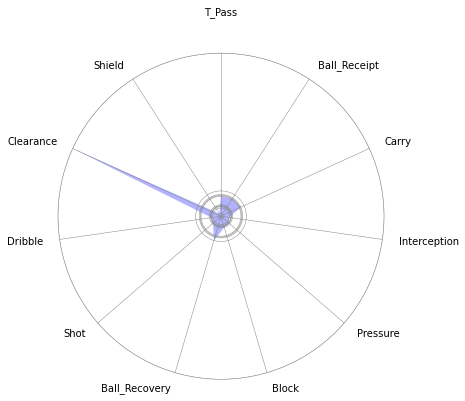

Player Name :  Jordi Alba Ramos 
Rating :  90.9090909090909


,T_Pass,Ball_Receipt,Carry,Interception,Pressure,Block,Ball_Recovery,Shot,Dribble,Clearance,Shield
39,1026,291,272,2,49,5,27,3,5,3,1


In [63]:
import math
#profile-radar
footstats = arr

values = d

plt.figure(figsize=(12,6))

N = len(footstats)
x_as = [n / float(N) * 2 * math.pi for n in range(N)]

values += values[:1]
x_as += x_as[:1]


plt.rc('axes', linewidth=0.5, edgecolor="#888888")
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(math.pi / 2)
ax.set_theta_direction(-1)

ax.set_rlabel_position(0)

ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)

plt.xticks(x_as[:-1], [])
plt.yticks(values[:-1], [])

ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)
ax.fill(x_as, values, 'b', alpha=0.3)

plt.ylim(0, 60) 

for i in range(N):
    angle_rad = i / float(N) * 2 * math.pi

    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < math.pi:
        ha, distance_ax = "left", 1
    elif angle_rad == math.pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1

    ax.text(angle_rad, 65 + distance_ax, footstats[i], size=10, horizontalalignment=ha, verticalalignment="center")


# Show polar plot
plt.show()
score_2 = 0.9033834586466166
print("Player Name : ", player_name, "\nRating : ", (count*100))
player_data